In [ ]:
import os
import cv2
import glob as gb
import random
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import callbacks
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.saving import save_model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# keras_model = load_model("/content/drive/MyDrive/College_Project_Materials/custom_cnn_model.h5")

In [ ]:
# import tensorflow as tf

# converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
# tfmodel = converter.convert()

# with open('cnn_model.tflite', 'wb') as f:
#     f.write(tfmodel)

In [ ]:
!ls

drive  sample_data


In [ ]:
# !unzip drive/MyDrive/Refactored_Dataset.zip > /dev/null
!unzip drive/MyDrive/project/wheat_leaves.zip > /dev/null
#!unzip drive/MyDrive/dataset_splitted.zip > /dev/null



In [ ]:
SOURCE_PATH = "wheat_leaves/"

DISEASE_CLASSES = ["Crown and Root Rot", "Fusarium Head Blight", "Healthy Wheat","Leaf Rust","Wheat Loose Smut","Wheat___Yellow_Rust"]

In [ ]:
classes = os.listdir(SOURCE_PATH)
print(classes)

['Crown and Root Rot', 'Wheat___Yellow_Rust', 'Wheat Loose Smut', 'Leaf Rust', 'Healthy Wheat', 'Fusarium Head Blight']


In [ ]:
data_counts = []
def count_images(data_path):
  for dir in os.listdir(data_path):
    image_dir = os.path.join(data_path, dir)
    count = 0
    for images in os.listdir(image_dir):
      count += 1
    data_counts.append(count)
    msg = f"Number of images in {dir} is: {count}"
    print(msg)

In [ ]:
count_images(SOURCE_PATH)

Number of images in Crown and Root Rot is: 929
Number of images in Wheat___Yellow_Rust is: 923
Number of images in Wheat Loose Smut is: 930
Number of images in Leaf Rust is: 723
Number of images in Healthy Wheat is: 1214
Number of images in Fusarium Head Blight is: 708


In [ ]:
print(data_counts)
print(f"Total Images: {sum(data_counts)}")

[929, 923, 930, 723, 1214, 708]
Total Images: 5427


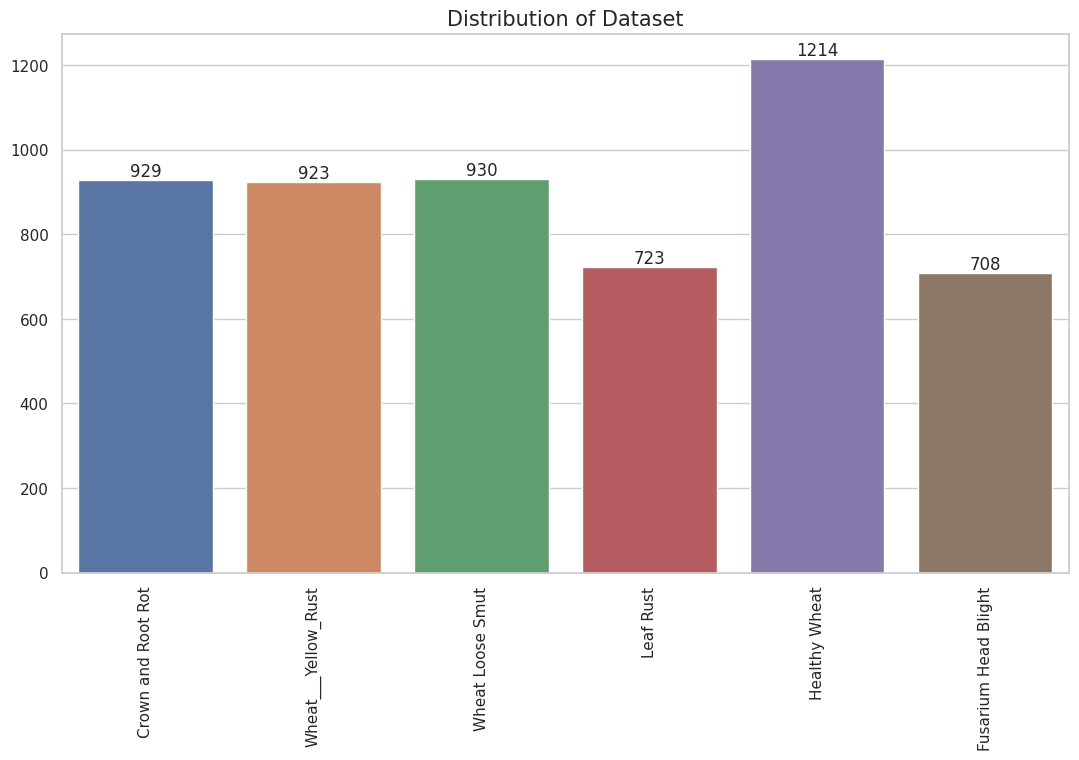

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,7))
ax = sns.barplot(x=classes, y=data_counts, hue=classes)
for container in ax.containers:
 ax.bar_label(container)
plt.title("Distribution of Dataset", fontsize=15, fontweight=20)
plt.xticks(rotation=90)
plt.show()


In [ ]:
## Splitting Dataset

In [ ]:
def split_image_dataset(source_data, data_path, test_size=0.1, validation_size=0.1, random_seed=None):
  """
  This function splits the original source data into train, test and validation
  using the (80,10,10) distribution principle

  Args:
      soruce_data(str): path of original source data.
      data_path(str): path of destination folder after splitting.
      test_size(float): test data size percentage. Default is 0.1.
      validation_size(float): validation data size percentage. Default is 0.1.
      random_seed(int): seed value for splitting randomly.

  """
  if not os.path.exists(data_path):
    os.makedirs(data_path)

  train_path = os.path.join(data_path, "train")
  test_path = os.path.join(data_path, "test")
  val_path = os.path.join(data_path, "validation")

  for path in [train_path, test_path, val_path]:
    if not os.path.exists(path):
      os.makedirs(path)

  for img_class in os.listdir(source_data):
    class_path = os.path.join(source_data, img_class)

    if os.path.isdir(class_path):
      for new_path in [os.path.join(train_path, img_class), os.path.join(test_path, img_class), os.path.join(val_path, img_class)]:
        if not os.path.exists(new_path):
          os.makedirs(new_path)

      class_images = os.listdir(class_path)
      train_images, test_val_images = train_test_split(class_images, test_size=(test_size + validation_size), shuffle=True, random_state=random_seed)
      test_images, val_images = train_test_split(test_val_images, test_size=validation_size/(test_size + validation_size), shuffle=True, random_state=random_seed)

      for image in train_images:
        shutil.copy2(os.path.join(class_path, image), os.path.join(train_path, img_class, image))
      for image in test_images:
        shutil.copy2(os.path.join(class_path, image), os.path.join(test_path, img_class, image))
      for image in val_images:
        shutil.copy2(os.path.join(class_path, image), os.path.join(val_path, img_class, image))

      print(f"Generated train, test and validation dataset for {img_class}")


In [ ]:
print(0.1/0.2)

0.5


In [ ]:
split_image_dataset(SOURCE_PATH, 'dataset', random_seed=42)

Generated train, test and validation dataset for Crown and Root Rot
Generated train, test and validation dataset for Wheat___Yellow_Rust
Generated train, test and validation dataset for Wheat Loose Smut
Generated train, test and validation dataset for Leaf Rust
Generated train, test and validation dataset for Healthy Wheat
Generated train, test and validation dataset for Fusarium Head Blight


In [ ]:
for dir in os.listdir('dataset/'):
  print("=" * 50)
  print(f"Counting number of images in {dir}...")
  count_images(f"dataset/{dir}")

Counting number of images in test...
Number of images in Healthy Wheat is: 121
Number of images in Leaf Rust is: 72
Number of images in Wheat___Yellow_Rust is: 92
Number of images in Crown and Root Rot is: 93
Number of images in Fusarium Head Blight is: 71
Number of images in Wheat Loose Smut is: 93
Counting number of images in validation...
Number of images in Healthy Wheat is: 122
Number of images in Leaf Rust is: 73
Number of images in Wheat___Yellow_Rust is: 93
Number of images in Crown and Root Rot is: 93
Number of images in Fusarium Head Blight is: 71
Number of images in Wheat Loose Smut is: 93
Counting number of images in train...
Number of images in Healthy Wheat is: 971
Number of images in Leaf Rust is: 578
Number of images in Wheat___Yellow_Rust is: 738
Number of images in Crown and Root Rot is: 743
Number of images in Fusarium Head Blight is: 566
Number of images in Wheat Loose Smut is: 744


In [ ]:
 #!zip -r drive/MyDrive/dataset_splitted.zip dataset/ > /dev/null

In [ ]:
num_classes = len(os.listdir("dataset/train"))
print(num_classes)

6


In [ ]:
### Using Transformers in Images

In [ ]:
import skimage
import skimage.color
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])


class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)

        try:
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

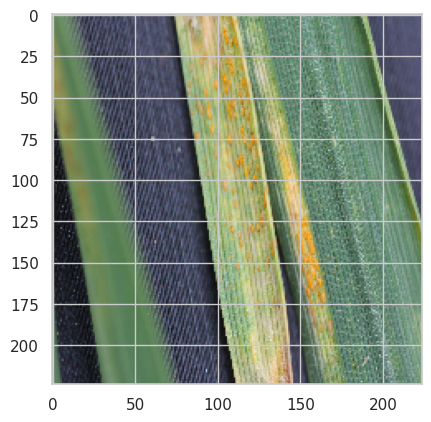

In [ ]:
X_train_ = cv2.cvtColor(cv2.imread("/content/wheat_leaves/Leaf Rust/00051.JPG"),cv2.COLOR_BGR2RGB)
X_train = cv2.resize(X_train_, (224,224))
plt.imshow(X_train)

In [ ]:
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
        pixels_per_cell=(2, 2),
        cells_per_block=(1,1),
        block_norm='L2-Hys',
        orientations=9,
)
scalify = StandardScaler()

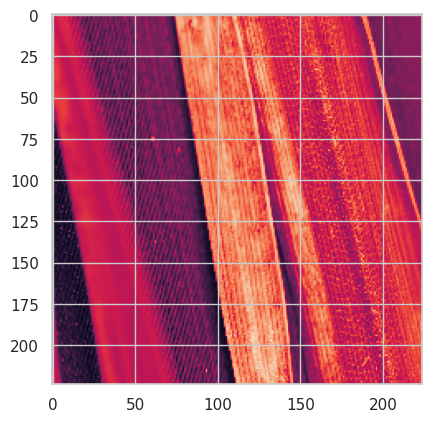

In [ ]:
X_train_gray = grayify.fit_transform(X_train)
plt.imshow(X_train_gray)

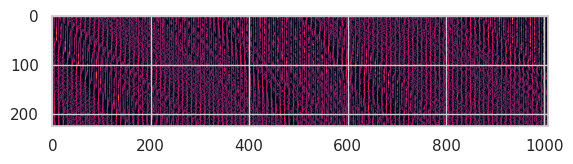

In [ ]:
X_train_hog = hogify.fit_transform(X_train)
plt.imshow(X_train_hog)

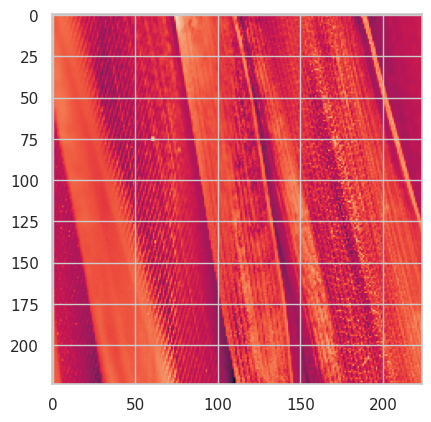

In [ ]:
X_train_prepared = scalify.fit_transform(X_train_gray)
plt.imshow(X_train_prepared)

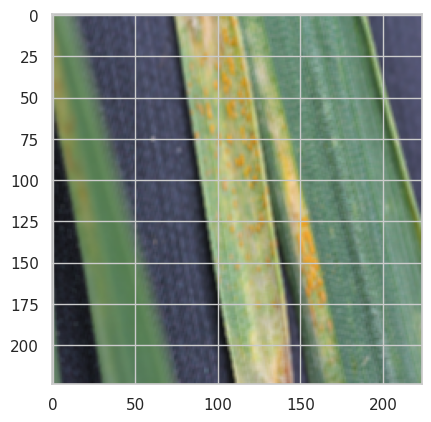

In [ ]:
X_train_blurred = cv2.GaussianBlur(X_train, ksize=(3,3), sigmaX=2)
plt.imshow(X_train_blurred)

In [ ]:
# call fit_transform on each transform converting X_train step by step
X_train_prepared = scalify.fit_transform(X_train_hog)

# X_test_gray = grayify.transform(X_test)
# X_test_hog = hogify.transform(X_test)
# X_test_prepared = scalify.transform(X_test_hog)

print(X_train_prepared.shape)

(224, 1008)


In [ ]:
### Displaying Sample Images


In [ ]:
#Viewing sample images of each class
def display_sample_images(img_dir):
  class_dirs = [d for d in os.listdir(img_dir) if os.path.isdir(os.path.join(img_dir, d))]
  num_rows = 2
  num_cols = 3
  fig_width = 15
  fig_height = 5 * num_rows

  fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

  for i, class_dir in enumerate(class_dirs):
      class_path = os.path.join(img_dir, class_dir)
      image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

      if image_files:
          random_image_file = random.choice(image_files)
          image_path = os.path.join(class_path, random_image_file)
          img = cv2.imread(image_path)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          row = i // num_cols
          col = i % num_cols
          axes[row, col].imshow(img)
          axes[row, col].set_title(f"Class: {class_dir}")
          axes[row, col].set_xlabel(f"Image Shape: {img.shape}", fontsize=10)
          axes[row, col].grid(False)
          # axes[row, col].axis('off')
  plt.show()


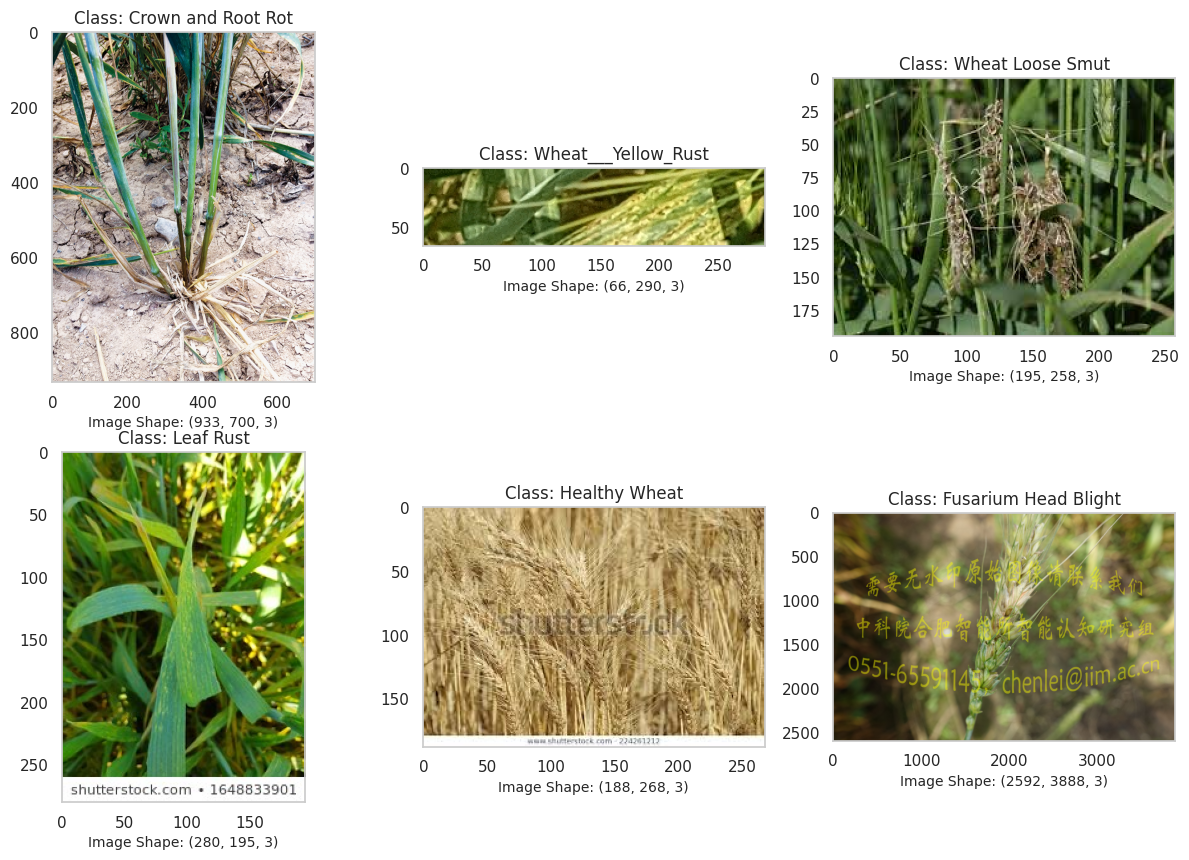

In [ ]:
display_sample_images('dataset/train')

In [ ]:
## Building a Model

In [ ]:
!nvidia-smi


Mon Apr  1 08:33:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
train_dir = 'dataset/train'
validation_dir = 'dataset/validation'
test_dir = 'dataset/test'

IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 24
CHANNELS = 3


def load_image(image_path):
  return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

def preprocess_image(image):
  img = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.expand_dims(img, axis=0)
  img = img / 255.0
  return img

In [ ]:
sample_img = load_image('/content/dataset/train/Wheat___Yellow_Rust/Yellow_rust397.png')
sample_pp_img = preprocess_image(sample_img)

<class 'numpy.ndarray'>
(374, 332, 3)


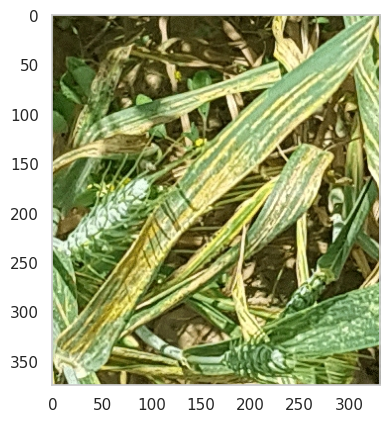

In [ ]:
#Image before Preprocessing
print(type(sample_img))
print(sample_img.shape)
plt.imshow(np.squeeze(sample_img))
plt.grid(False)

<class 'numpy.ndarray'>
(1, 224, 224, 3)


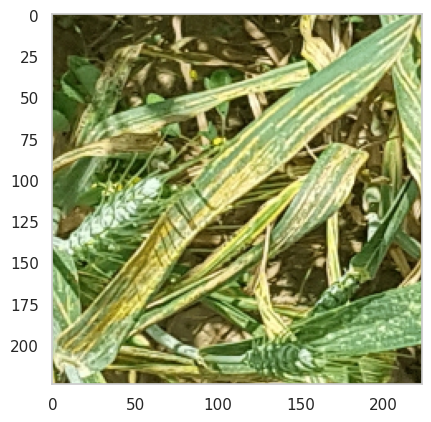

In [ ]:
# Image after Preprocessing
print(type(sample_pp_img))
print(sample_pp_img.shape)
plt.imshow(np.squeeze(sample_pp_img))
plt.grid(False)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    # shear_range=0.2,
    # brightness_range = [0.5, 1.5],
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest'
    )

valid_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    seed=42)

validation_generator = valid_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')

test_generator = valid_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='categorical')


Found 4202 images belonging to 6 classes.
Found 527 images belonging to 6 classes.
Found 522 images belonging to 6 classes.


In [ ]:
#### Custom CNN Model

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                        

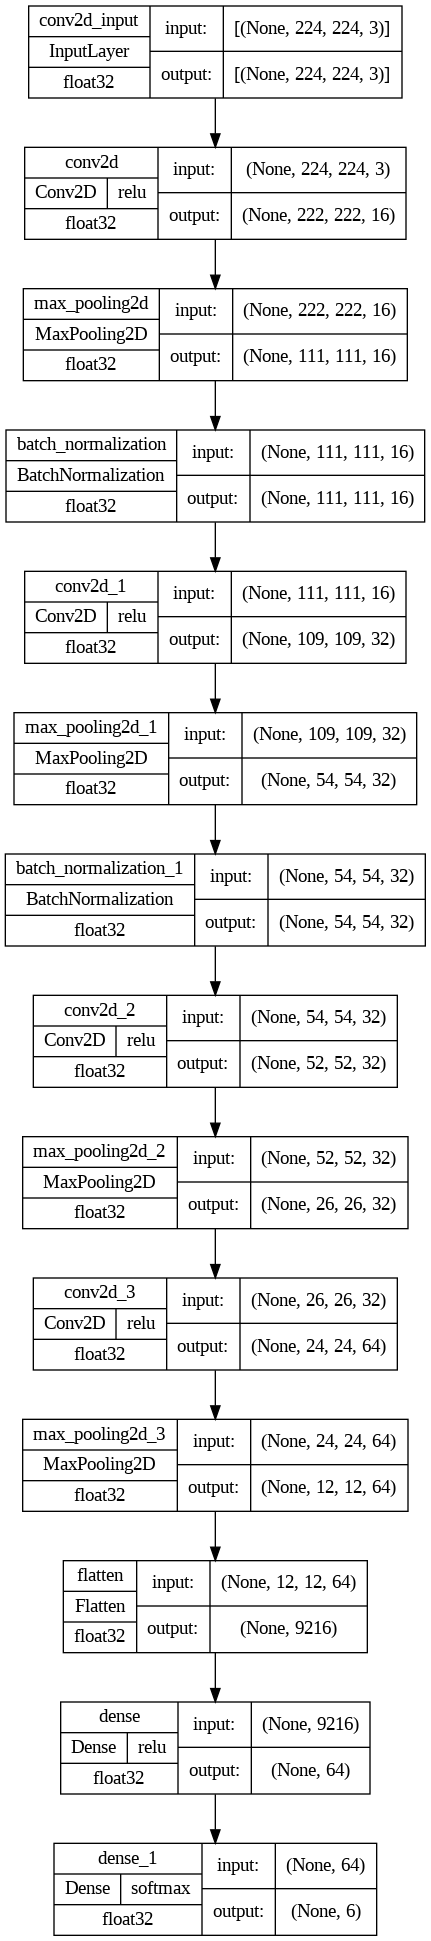

In [ ]:
plot_model(model, to_file = "drive/MyDrive/project/images/model.png", show_shapes = True,
           rankdir= 'TR', show_dtype = True, show_layer_activations= True)

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor="val_accuracy",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy',verbose=1,patience=5,min_lr=0.001)

In [ ]:
EPOCHS = 30
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    # callbacks=[earlystopping]
)

Epoch 1/30
 65/175 [==========>...................] - ETA: 1:40 - loss: 1.6166 - accuracy: 0.3712

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


175/175 [==============================] - 202s 1s/step - loss: 1.3854 - accuracy: 0.4596 - val_loss: 1.6453 - val_accuracy: 0.3155
Epoch 2/30
175/175 [==============================] - 171s 978ms/step - loss: 1.0352 - accuracy: 0.6075 - val_loss: 1.7358 - val_accuracy: 0.2937
Epoch 3/30
175/175 [==============================] - 166s 947ms/step - loss: 0.9034 - accuracy: 0.6719 - val_loss: 1.0218 - val_accuracy: 0.6071
Epoch 4/30
175/175 [==============================] - 165s 946ms/step - loss: 0.8390 - accuracy: 0.6900 - val_loss: 0.7354 - val_accuracy: 0.7460
Epoch 5/30
175/175 [==============================] - 165s 943ms/step - loss: 0.7856 - accuracy: 0.7104 - val_loss: 2.5372 - val_accuracy: 0.4167
Epoch 6/30
175/175 [==============================] - 173s 989ms/step - loss: 0.7662 - accuracy: 0.7190 - val_loss: 1.0365 - val_accuracy: 0.6905
Epoch 7/30
175/175 [==============================] - 166s 945ms/step - loss: 0.7109 - accuracy: 0.7551 - val_loss: 0.7753 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

21/21 [==============================] - 14s 698ms/step - loss: 0.8376 - accuracy: 0.7460
Test Accuracy: 74.60%


In [ ]:
### Plotting the Accuracy and Loss Graphs

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 175}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(acc, val_acc)

[0.45955002307891846, 0.6074677109718323, 0.6718525886535645, 0.6900430917739868, 0.7103877663612366, 0.7190043330192566, 0.7551460266113281, 0.741263747215271, 0.7556247115135193, 0.7599329948425293, 0.7582575678825378, 0.775969386100769, 0.7867400646209717, 0.7680708765983582, 0.7788415551185608, 0.787936806678772, 0.7817137241363525, 0.7915270328521729, 0.7977501153945923, 0.8020583987236023, 0.7867400646209717, 0.7991862297058105, 0.8034945130348206, 0.8070847392082214, 0.8125897645950317, 0.796314001083374, 0.8089995384216309, 0.8106749653816223, 0.7999042868614197, 0.8123503923416138] [0.3154761791229248, 0.2936508059501648, 0.6071428656578064, 0.7460317611694336, 0.4166666567325592, 0.6904761791229248, 0.6944444179534912, 0.704365074634552, 0.6884920597076416, 0.3988095223903656, 0.6805555820465088, 0.7599206566810608, 0.7817460298538208, 0.7242063283920288, 0.7341269850730896, 0.726190447807312, 0.7599206566810608, 0.7678571343421936, 0.7658730149269104, 0.7996031641960144, 0.6

In [ ]:
print(acc)

[0.45955002307891846, 0.6074677109718323, 0.6718525886535645, 0.6900430917739868, 0.7103877663612366, 0.7190043330192566, 0.7551460266113281, 0.741263747215271, 0.7556247115135193, 0.7599329948425293, 0.7582575678825378, 0.775969386100769, 0.7867400646209717, 0.7680708765983582, 0.7788415551185608, 0.787936806678772, 0.7817137241363525, 0.7915270328521729, 0.7977501153945923, 0.8020583987236023, 0.7867400646209717, 0.7991862297058105, 0.8034945130348206, 0.8070847392082214, 0.8125897645950317, 0.796314001083374, 0.8089995384216309, 0.8106749653816223, 0.7999042868614197, 0.8123503923416138]


In [ ]:
print(val_acc)

[0.3154761791229248, 0.2936508059501648, 0.6071428656578064, 0.7460317611694336, 0.4166666567325592, 0.6904761791229248, 0.6944444179534912, 0.704365074634552, 0.6884920597076416, 0.3988095223903656, 0.6805555820465088, 0.7599206566810608, 0.7817460298538208, 0.7242063283920288, 0.7341269850730896, 0.726190447807312, 0.7599206566810608, 0.7678571343421936, 0.7658730149269104, 0.7996031641960144, 0.6845238208770752, 0.7658730149269104, 0.829365074634552, 0.7361111044883728, 0.7916666865348816, 0.7678571343421936, 0.7698412537574768, 0.7797619104385376, 0.7916666865348816, 0.7579365372657776]


In [ ]:
print(loss)

[1.3853671550750732, 1.035213828086853, 0.9034420847892761, 0.8390112519264221, 0.7855736017227173, 0.7661595344543457, 0.7109358310699463, 0.7118498086929321, 0.6752147674560547, 0.6684812903404236, 0.6698593497276306, 0.6421388983726501, 0.6005079746246338, 0.6522355675697327, 0.6247437000274658, 0.5920289158821106, 0.6068181395530701, 0.5936622619628906, 0.5694290995597839, 0.5659907460212708, 0.5753567814826965, 0.5561273097991943, 0.5523374676704407, 0.5428736805915833, 0.5341914892196655, 0.5476665496826172, 0.5315377116203308, 0.5265730023384094, 0.5567585229873657, 0.5332024693489075]


In [ ]:
print(val_loss)

[1.6453118324279785, 1.7357834577560425, 1.02180814743042, 0.7353879809379578, 2.537245273590088, 1.036464810371399, 0.7753406167030334, 0.7446838617324829, 0.9822937846183777, 2.097566604614258, 1.012266993522644, 0.7100098729133606, 0.6521614789962769, 0.7904484868049622, 0.7177118062973022, 0.7949256896972656, 0.6139628291130066, 0.6826930046081543, 0.6392902135848999, 0.50758957862854, 1.0024105310440063, 0.6143612265586853, 0.5305377840995789, 0.8834762573242188, 0.5663366913795471, 0.6796100735664368, 0.7296096682548523, 0.6641873717308044, 0.6281742453575134, 0.8733683228492737]


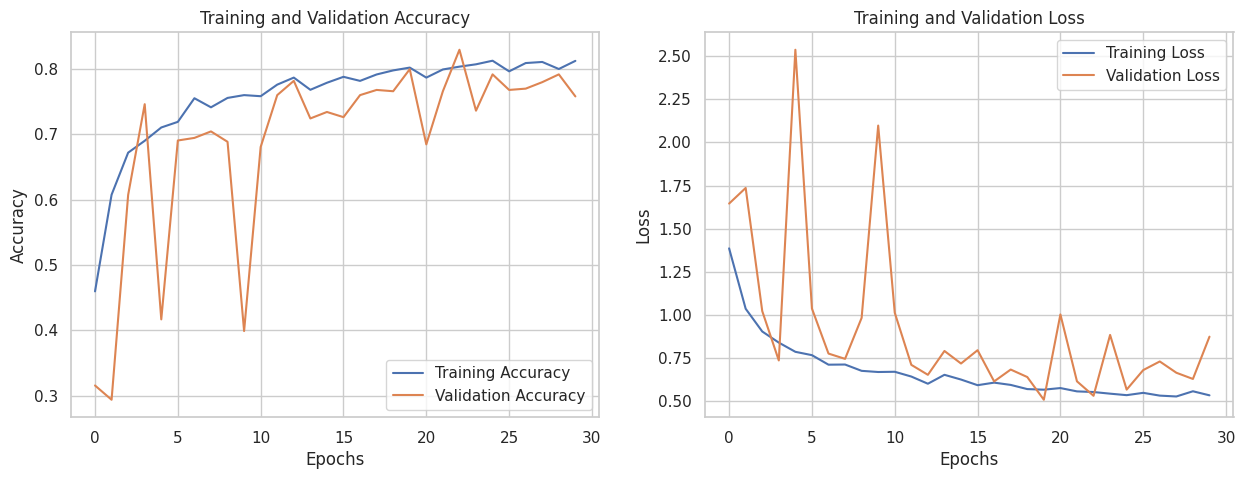

In [ ]:
# stopped_epoch = earlystopping.stopped_epoch + 1
EPOCHS = 30
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
### Running Predictions

In [ ]:
test_generator.class_indices

{'Crown and Root Rot': 0,
 'Fusarium Head Blight': 1,
 'Healthy Wheat': 2,
 'Leaf Rust': 3,
 'Wheat Loose Smut': 4,
 'Wheat___Yellow_Rust': 5}

In [ ]:
# Testing on test images:
def predict(model, img):
  image = load_image(img)
  img_array = preprocess_image(image)
  predictions = model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

---- Predicted Result ----
1/1 [==============================] - 0s 404ms/step


('Wheat Loose Smut', 65.44)

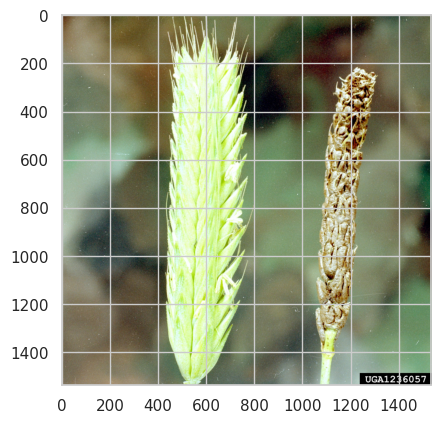

In [ ]:
plt.imshow(load_image("/content/dataset/train/Wheat Loose Smut/0051.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Wheat Loose Smut/0051.jpg")

---- Predicted Result ----
1/1 [==============================] - 0s 38ms/step


('Crown and Root Rot', 81.42)

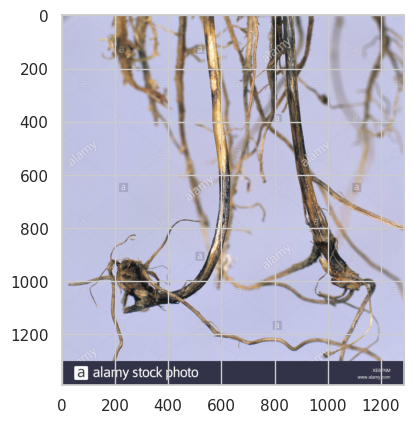

In [ ]:
plt.imshow(load_image("/content/dataset/train/Crown and Root Rot/03611.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Crown and Root Rot/03611.jpg")

In [ ]:
plt.imshow(load_image("/content/dataset/train/Healthy Wheat/01271.png"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Healthy Wheat/01271.png")

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


---- Predicted Result ----
1/1 [==============================] - 0s 31ms/step


('Fusarium Head Blight', 100.0)

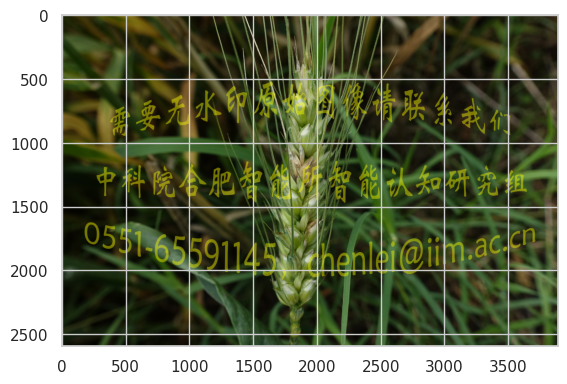

In [ ]:
plt.imshow(load_image("/content/dataset/train/Fusarium Head Blight/00841.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Fusarium Head Blight/00841.jpg")

---- Predicted Result ----
1/1 [==============================] - 0s 23ms/step


('Healthy Wheat', 98.66)

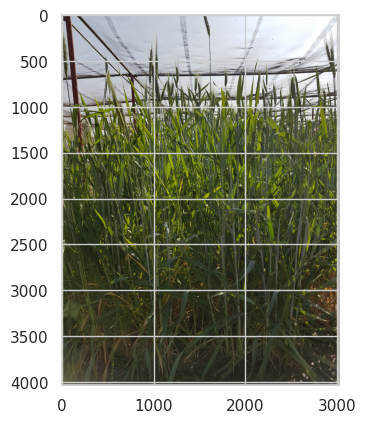

In [ ]:
plt.imshow(load_image("/content/dataset/train/Healthy Wheat/00611.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Healthy Wheat/00611.jpg")

---- Predicted Result ----
1/1 [==============================] - 0s 32ms/step


('Fusarium Head Blight', 100.0)

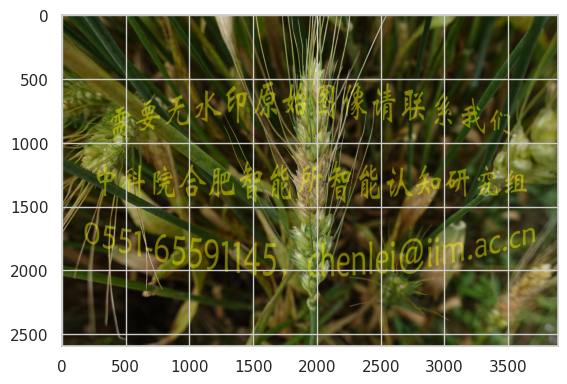

In [ ]:
plt.imshow(load_image("/content/dataset/train/Fusarium Head Blight/07661.jpg"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Fusarium Head Blight/07661.jpg")

---- Predicted Result ----
1/1 [==============================] - 0s 445ms/step


('Wheat___Yellow_Rust', 99.32)

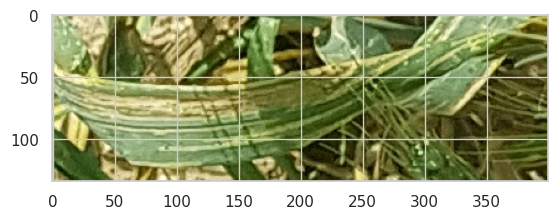

In [ ]:
plt.imshow(load_image("/content/dataset/train/Wheat___Yellow_Rust/Yellow_rust1090.png"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Wheat___Yellow_Rust/Yellow_rust1090.png")

---- Predicted Result ----
1/1 [==============================] - 0s 18ms/step


('Leaf Rust', 99.39)

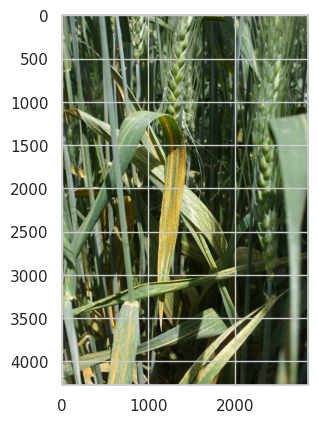

In [ ]:
plt.imshow(load_image("/content/dataset/train/Leaf Rust/00541.JPG"))
print("---- Predicted Result ----")
predict(model=model, img="/content/dataset/train/Leaf Rust/00541.JPG")

In [ ]:
def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

In [ ]:
y_test, y_labels = extract_data(test_generator)

In [ ]:
predictions = model.predict(y_test)
y_preds = np.argmax(predictions, axis=1)

17/17 [==============================] - 1s 25ms/step


In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
# print(true_classes)
print(class_labels)

['Crown and Root Rot', 'Fusarium Head Blight', 'Healthy Wheat', 'Leaf Rust', 'Wheat Loose Smut', 'Wheat___Yellow_Rust']


In [ ]:
### Saving the Model

In [ ]:
from tensorflow.keras.models import save_model

save_model(model, "custom_cnn20epochaccuratedata_model_iter_1.h5", save_format="h5")

<ipython-input-62-1010a1a45285>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "custom_cnn20epochaccuratedata_model_iter_1.h5", save_format="h5")


In [ ]:
!mv custom_cnn20epochaccuratedata_model_iter_1.h5 drive/MyDrive/

In [ ]:
import tensorflow as tf

# Load the Keras model in h5 format
model = tf.keras.models.load_model('/content/drive/MyDrive/custom_cnn20epochaccuratedata_model_iter_1.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('/content/drive/MyDrive/converted_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Conversion to TensorFlow Lite completed successfully!")

Conversion to TensorFlow Lite completed successfully!


In [ ]:
### Custom CNN Metrics

In [ ]:
cm = confusion_matrix(true_classes, y_preds)

<Axes: >

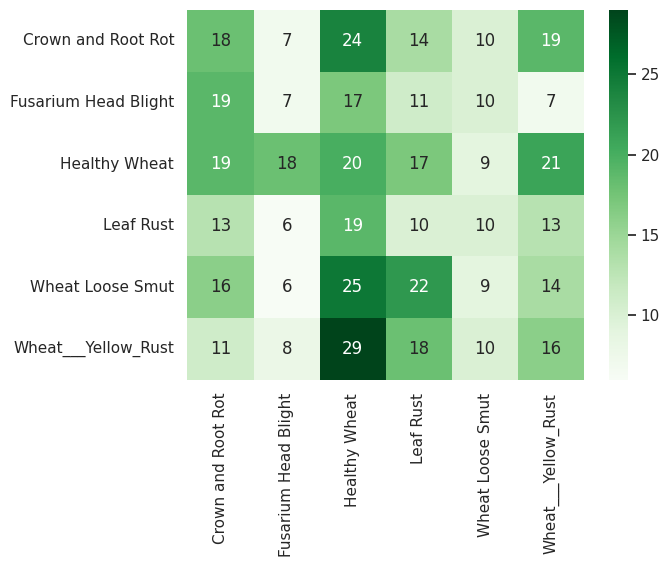

In [ ]:
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')

In [ ]:
print(classification_report(true_classes, y_preds, target_names=class_labels))

                      precision    recall  f1-score   support

  Crown and Root Rot       0.19      0.20      0.19        92
Fusarium Head Blight       0.13      0.10      0.11        71
       Healthy Wheat       0.15      0.19      0.17       104
           Leaf Rust       0.11      0.14      0.12        71
    Wheat Loose Smut       0.16      0.10      0.12        92
 Wheat___Yellow_Rust       0.18      0.17      0.18        92

            accuracy                           0.15       522
           macro avg       0.15      0.15      0.15       522
        weighted avg       0.15      0.15      0.15       522



In [ ]:
{
    "0" : "Fusarium Head Blight",
    "1" : "Healthy Wheat",
    "2" : "Leaf Rust ",
    "3" : "Wheat___Brown_Rust",
    "4" : " Wheat___Yellow_Rust ",
    "5" : "septoria"
    }

{'0': 'Fusarium Head Blight',
 '1': 'Healthy Wheat',
 '2': 'Leaf Rust ',
 '3': 'Wheat___Brown_Rust',
 '4': ' Wheat___Yellow_Rust ',
 '5': 'septoria'}

In [ ]:
{'Fusarium Head Blight': 0,
 'Healthy Whea': 1,
 'Leaf Rust': 2,
 'Wheat___Brown_Rust': 3,
 'Wheat___Yellow_Rust': 4,
 'septoria': 5
}

{'Fusarium Head Blight': 0,
 'Healthy Whea': 1,
 'Leaf Rust': 2,
 'Wheat___Brown_Rust': 3,
 'Wheat___Yellow_Rust': 4,
 'septoria': 5}

In [ ]:
Using Transfer Learning with ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet

resnet = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
print(f"Number of layers in ResNet50: {len(resnet.layers)}")
print(f"Number of layers in ResNet50: {len(resnet.layers[:100])}")

Number of layers in ResNet50: 175
Number of layers in ResNet50: 100


In [ ]:
# finetune_layers = 100
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
#### ResNet50 Model

In [ ]:
from keras import layers, models
from keras.applications import ResNet50

# Load ResNet50 model without the top classification layer
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
resnet.trainable = False

# Create your model
model_resnet = models.Sequential()
model_resnet.add(resnet)
model_resnet.add(layers.GlobalAveragePooling2D())
model_resnet.add(layers.Dense(64, activation='relu'))
model_resnet.add(layers.Dropout(0.2))
model_resnet.add(layers.Dense(num_classes,activation='softmax'))


# Compile the model
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_resnet.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 23719238 (90.48 MB)
Trainable params: 131526 (513.77 KB)
Non-trainable params: 23587712 (89.98 MB)
_______

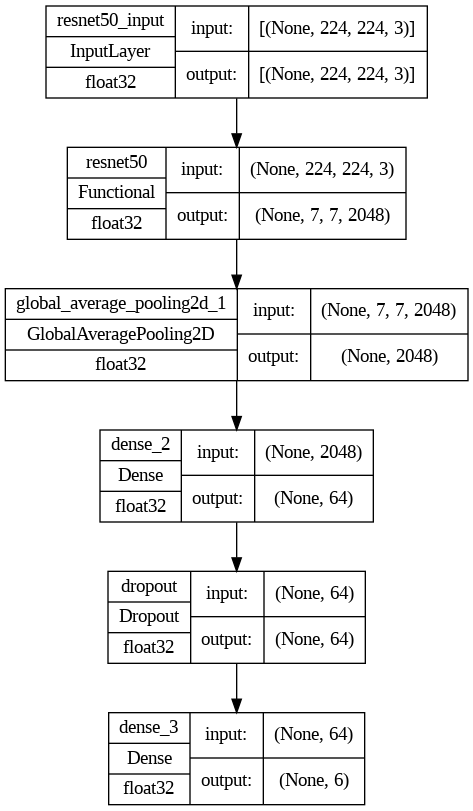

In [ ]:
plot_model(model_resnet, show_shapes = True, show_dtype = True)

In [ ]:
resnet_train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True,
                                      vertical_flip = True,
                                      preprocessing_function=preprocess_input_resnet)

resnet_val_test_datagen = ImageDataGenerator(rescale=1./255,
                                             preprocessing_function=preprocess_input_resnet)

train_generator_resnet = resnet_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42)

validation_generator_resnet = resnet_val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    shuffle=True,
    seed=42,
    class_mode='categorical')

test_generator_resnet = resnet_val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')


Found 4036 images belonging to 6 classes.
Found 507 images belonging to 6 classes.
Found 504 images belonging to 6 classes.


In [ ]:
model_resnet.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history_resnet = model_resnet.fit(
    train_generator_resnet,
    steps_per_epoch=train_generator_resnet.samples // 32,
    epochs=10,
    validation_data=validation_generator_resnet,
    validation_steps=validation_generator_resnet.samples // 32
    )

Epoch 1/10
126/126 [==============================] - 249s 2s/step - loss: 1.5553 - accuracy: 0.3489 - val_loss: 1.3899 - val_accuracy: 0.4396
Epoch 2/10
126/126 [==============================] - 222s 2s/step - loss: 1.3759 - accuracy: 0.4321 - val_loss: 1.3193 - val_accuracy: 0.4604
Epoch 3/10
126/126 [==============================] - 237s 2s/step - loss: 1.3249 - accuracy: 0.4406 - val_loss: 1.2631 - val_accuracy: 0.4792
Epoch 4/10
126/126 [==============================] - 219s 2s/step - loss: 1.2926 - accuracy: 0.4648 - val_loss: 1.2368 - val_accuracy: 0.5604
Epoch 5/10
126/126 [==============================] - 219s 2s/step - loss: 1.2566 - accuracy: 0.4883 - val_loss: 1.1966 - val_accuracy: 0.5542
Epoch 6/10
126/126 [==============================] - 238s 2s/step - loss: 1.2365 - accuracy: 0.4973 - val_loss: 1.1915 - val_accuracy: 0.5708
Epoch 7/10
126/126 [==============================] - 235s 2s/step - loss: 1.2081 - accuracy: 0.5140 - val_loss: 1.1812 - val_accuracy: 0.6062

In [ ]:
test_loss_resnet, test_accuracy_resnet = model_resnet.evaluate(test_generator_resnet, steps=test_generator_resnet.samples // 32)
print(f'Test Accuracy: {test_accuracy_resnet * 100:.2f}%')

15/15 [==============================] - 17s 1s/step - loss: 1.0412 - accuracy: 0.6292
Test Accuracy: 62.92%


In [ ]:
#### Plotting Accuracy And Loss Graphs

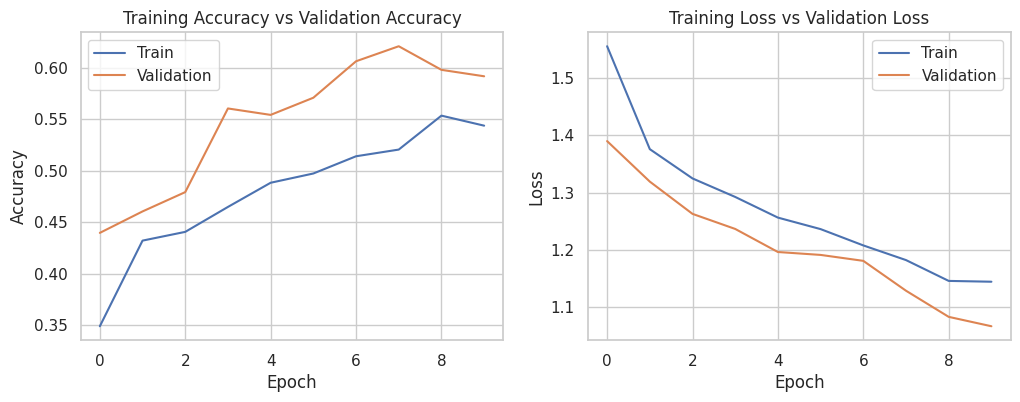

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_resnet.history['accuracy']
train_loss = history_resnet.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history_resnet.history['accuracy'])
ax[0].plot(history_resnet.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_resnet.history['loss'])
ax[1].plot(history_resnet.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
#### Running Predictions

In [ ]:
def predict_resnet(res_model, img):
  image = load_image(img)

  img_array = cv2.resize(image, (224, 224))
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = img_array / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input_resnet(img_array)

  predictions = res_model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions)]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

In [ ]:
predict_resnet(res_model=model_resnet, img="/content/dataset/train/septoria/los(65).jpg")

1/1 [==============================] - 0s 56ms/step


('septoria', 95.19)

In [ ]:
print(train_generator_resnet.class_indices)

{'Leaf Rust': 0, 'Wheat___Brown_Rust': 1, 'Wheat___Yellow_Rust': 2, 'healthy': 3, 'septoria': 4, 'stripe_rust': 5}


In [ ]:
def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

In [ ]:
print(DISEASE_CLASSES)

['healthy', 'stripe_rust', 'Leaf Rust', 'septoria', 'Wheat___Brown_Rust', 'Wheat___Yellow_Rust']


In [ ]:
y_test, y_labels = extract_data(test_generator_resnet)

In [ ]:
print(np.unique(y_labels))

[0. 1.]


In [ ]:
true_classes = test_generator_resnet.classes
class_labels = list(test_generator_resnet.class_indices.keys())
# print(true_classes)
print(class_labels)

['Leaf Rust', 'Wheat___Brown_Rust', 'Wheat___Yellow_Rust', 'healthy', 'septoria', 'stripe_rust']


In [ ]:
predictions_resnet = model_resnet.predict(y_test)
y_preds = np.argmax(predictions_resnet, axis=1)

16/16 [==============================] - 3s 218ms/step


In [ ]:
print(y_preds)

[4 4 2 2 2 1 4 5 4 1 2 2 5 2 0 2 2 0 4 1 0 3 0 3 4 5 2 4 2 5 1 4 2 5 2 1 1
 2 3 0 0 3 0 2 3 3 3 0 3 3 5 0 5 2 2 4 0 5 5 2 0 3 1 5 5 0 3 5 5 0 3 1 4 2
 1 3 2 3 0 0 5 2 4 1 1 4 0 1 4 1 4 1 4 2 5 5 1 2 4 4 1 1 1 2 0 2 1 4 4 5 5
 4 1 5 1 1 1 1 0 1 1 4 4 4 4 4 1 4 0 2 0 2 5 1 1 1 1 4 4 1 4 1 1 1 4 1 1 1
 1 4 4 1 4 4 1 4 1 1 2 4 1 1 4 1 1 1 1 2 4 2 2 1 2 3 2 2 0 2 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 0 3 3 2 3 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 5 2 2 2 2 2 3 2
 2 0 2 2 2 4 3 3 3 3 3 3 3 3 3 2 3 0 3 3 3 3 3 3 3 2 3 3 3 2 2 2 3 3 2 3 3
 2 3 3 0 3 3 3 3 2 3 2 3 3 2 3 3 3 0 3 3 3 2 3 3 3 3 3 3 2 3 3 3 2 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 5 4 5 5 5 5 5 5 5 5 1 4 4 5
 1 5 5 4 5 5 4 4 5 1 4 1 5 5 5 5 1 1 4 4 5 4 0 4 2 5 3 5 5 4 4 5 4 5 2 5 4
 5 5 4 4 4 1 5 5 2 2 5 5 

In [ ]:
#### ResNet Metrics

<Axes: >

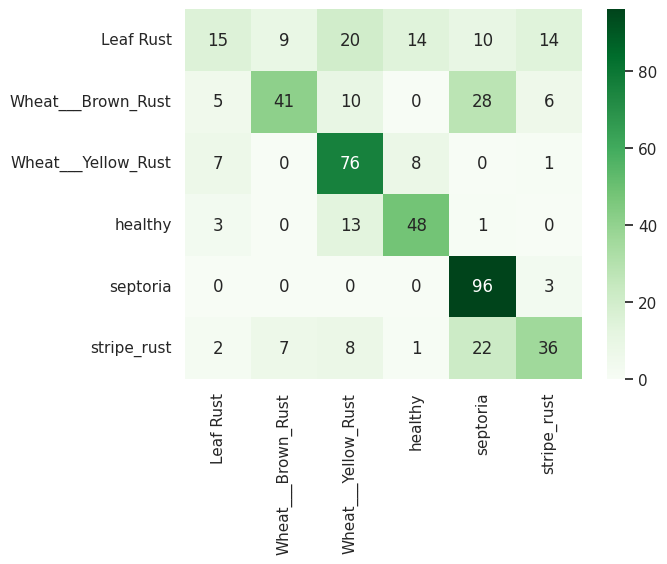

In [ ]:
cm = confusion_matrix(true_classes, y_preds)
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')

In [ ]:
print(classification_report(true_classes, y_preds, target_names=class_labels))

                     precision    recall  f1-score   support

          Leaf Rust       0.47      0.18      0.26        82
 Wheat___Brown_Rust       0.72      0.46      0.56        90
Wheat___Yellow_Rust       0.60      0.83      0.69        92
            healthy       0.68      0.74      0.71        65
           septoria       0.61      0.97      0.75        99
        stripe_rust       0.60      0.47      0.53        76

           accuracy                           0.62       504
          macro avg       0.61      0.61      0.58       504
       weighted avg       0.61      0.62      0.59       504



In [ ]:
#saving resnet model

In [ ]:
from tensorflow.keras.models import save_model

save_model(model_resnet, "resnet_model_iter_1.h5", save_format="h5")

<ipython-input-95-555a0afa7347>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_resnet, "resnet_model_iter_1.h5", save_format="h5")


In [ ]:
!mv resnet_model_iter_1.h5 drive/MyDrive/

In [ ]:
## Using Transfer Learning with VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg

vgg16 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
print(len(vgg16.layers))

19


In [ ]:
for layer in vgg16.layers:
  layer.trainable = False

In [ ]:
#### VGG16 Model

In [ ]:
model_vgg16 = models.Sequential()

model_vgg16.add(vgg16)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(128,activation='relu'))
# model_vgg16.add(layers.BatchNormalization())
model_vgg16.add(layers.Dropout(0.2))

model_vgg16.add(layers.Dense(32,activation='relu'))
model_vgg16.add(layers.Dense(6,activation='softmax'))

In [ ]:
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
Total params: 17930406 (68.40 MB)
Trainable params: 32

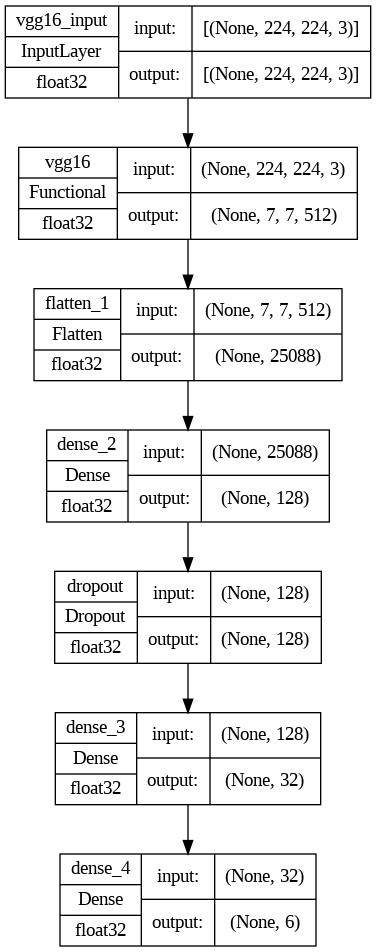

In [ ]:
plot_model(model_vgg16, show_shapes = True, show_dtype = True)

In [ ]:
vgg_train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      width_shift_range=0.1,
                                      height_shift_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True,
                                      vertical_flip = True,
                                      preprocessing_function=preprocess_input_vgg
                                      )

vgg_val_test_datagen = ImageDataGenerator(rescale=1./255,
                                          preprocessing_function=preprocess_input_vgg)

train_generator_vgg = vgg_train_datagen.flow_from_directory(train_dir, target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42)

validation_generator_vgg = vgg_val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True,
    seed=42
    )

test_generator_vgg = vgg_val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')

Found 4036 images belonging to 6 classes.
Found 507 images belonging to 6 classes.
Found 504 images belonging to 6 classes.


In [ ]:




model_vgg16.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history_vgg = model_vgg16.fit(
    train_generator_vgg,
    steps_per_epoch=train_generator_vgg.samples // 32,
    epochs=20,
    validation_data=validation_generator_vgg,
    validation_steps=validation_generator_vgg.samples // 32,
    # callbacks=[earlystopping]
)


Epoch 1/20
126/126 [==============================] - 237s 2s/step - loss: 0.8547 - accuracy: 0.6971 - val_loss: 0.2542 - val_accuracy: 0.9333
Epoch 2/20
126/126 [==============================] - 203s 2s/step - loss: 0.4035 - accuracy: 0.8579 - val_loss: 0.1810 - val_accuracy: 0.9438
Epoch 3/20
126/126 [==============================] - 208s 2s/step - loss: 0.3113 - accuracy: 0.8939 - val_loss: 0.1868 - val_accuracy: 0.9333
Epoch 4/20
126/126 [==============================] - 204s 2s/step - loss: 0.2484 - accuracy: 0.9163 - val_loss: 0.1538 - val_accuracy: 0.9375
Epoch 5/20
126/126 [==============================] - 233s 2s/step - loss: 0.2252 - accuracy: 0.9233 - val_loss: 0.1005 - val_accuracy: 0.9729
Epoch 6/20
126/126 [==============================] - 209s 2s/step - loss: 0.2140 - accuracy: 0.9216 - val_loss: 0.1387 - val_accuracy: 0.9438
Epoch 7/20
126/126 [==============================] - 211s 2s/step - loss: 0.1937 - accuracy: 0.9333 - val_loss: 0.1005 - val_accuracy: 0.9604

In [ ]:
test_loss_vgg, test_accuracy_vgg = model_vgg16.evaluate(test_generator_vgg, steps=test_generator_vgg.samples // 32)
print(f'Test Accuracy: {test_accuracy_vgg * 100:.2f}%')

15/15 [==============================] - 26s 2s/step - loss: 0.0667 - accuracy: 0.9792
Test Accuracy: 97.92%


In [ ]:
#### Plotting Graphs

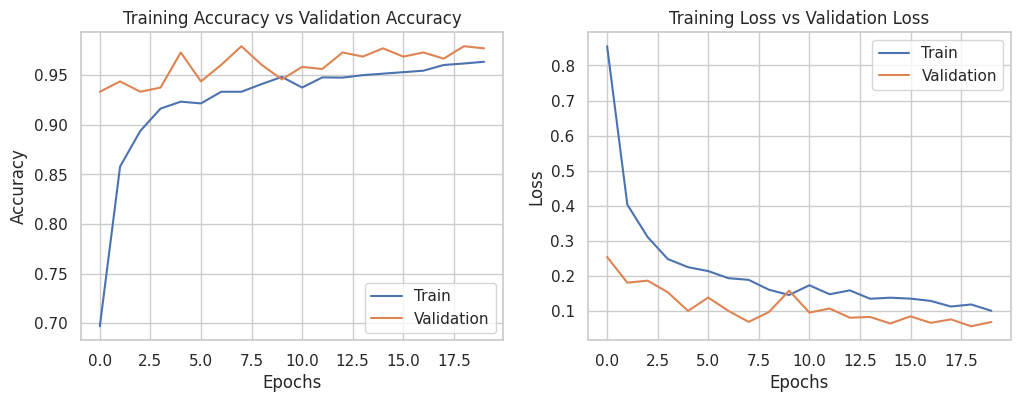

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_vgg.history['accuracy']
train_loss = history_vgg.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history_vgg.history['accuracy'])
ax[0].plot(history_vgg.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].legend(['Train', 'Validation'], loc='lower right')

ax[1].plot(history_vgg.history['loss'])
ax[1].plot(history_vgg.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
#### Running Predictions

In [ ]:
def predict_vgg(vgg_model, img):
  image = load_image(img)

  img_array = cv2.resize(image, (224, 224))
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = img_array / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input_vgg(img_array)

  predictions = vgg_model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions)]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

In [ ]:
def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

In [ ]:
print(test_generator_vgg.class_indices)

{'Leaf Rust': 0, 'Wheat___Brown_Rust': 1, 'Wheat___Yellow_Rust': 2, 'healthy': 3, 'septoria': 4, 'stripe_rust': 5}


In [ ]:
print(DISEASE_CLASSES)

['healthy', 'stripe_rust', 'Leaf Rust', 'septoria', 'Wheat___Brown_Rust', 'Wheat___Yellow_Rust']


In [ ]:
y_test, y_labels = extract_data(test_generator_vgg)

In [ ]:
print(np.unique(y_labels))

[0. 1.]


In [ ]:
predictions_vgg = model_vgg16.predict(y_test)
y_preds = np.argmax(predictions_vgg, axis=1)

16/16 [==============================] - 9s 524ms/step


In [ ]:
print(y_preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 

In [ ]:
true_classes = test_generator_vgg.classes
class_labels = list(test_generator_vgg.class_indices.keys())
# print(true_classes)
print(class_labels)

['Leaf Rust', 'Wheat___Brown_Rust', 'Wheat___Yellow_Rust', 'healthy', 'septoria', 'stripe_rust']


In [ ]:
#### VGG Metrics

<Axes: >

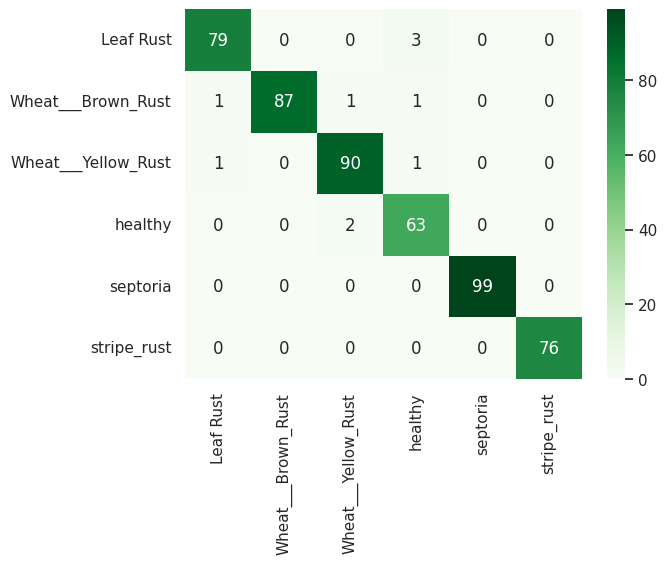

In [ ]:
cm = confusion_matrix(true_classes, y_preds)
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')

In [ ]:
print(classification_report(true_classes, y_preds, target_names=class_labels))

                     precision    recall  f1-score   support

          Leaf Rust       0.98      0.96      0.97        82
 Wheat___Brown_Rust       1.00      0.97      0.98        90
Wheat___Yellow_Rust       0.97      0.98      0.97        92
            healthy       0.93      0.97      0.95        65
           septoria       1.00      1.00      1.00        99
        stripe_rust       1.00      1.00      1.00        76

           accuracy                           0.98       504
          macro avg       0.98      0.98      0.98       504
       weighted avg       0.98      0.98      0.98       504



In [ ]:
### Saving the Model

In [ ]:
from tensorflow.keras.models import save_model

save_model(model_vgg16, "vgg16_model_iter_1.h5", save_format="h5")

<ipython-input-62-182c6cf27600>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_vgg16, "vgg16_model_iter_1.h5", save_format="h5")


In [ ]:
!mv vgg16_model_iter_1.h5 drive/MyDrive/

In [ ]:
## Using Tranfer Learning with MobileNetV2

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mb

mobilenet = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)

In [ ]:
print(len(mobilenet.layers))

154


In [ ]:
for layer in mobilenet.layers:
  layer.trainable = False

In [ ]:
### MobileNetV2 Model

In [ ]:
model_mb = models.Sequential()

model_mb.add(mobilenet)
model_mb.add(layers.Flatten())
# model_mb.add(layers.Dropout(0.5))
model_mb.add(layers.Dense(64,activation='relu'))
# model_mb.add(layers.BatchNormalization())
model_mb.add(layers.Dropout(0.2))

# model_mb.add(layers.Dense(128,activation='relu'))
# model_mb.add(layers.Dropout(0.2))
model_mb.add(layers.Dense(6,activation='softmax'))

In [ ]:
model_mb.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                4014144   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 6)                 390       
                                                                 
Total params: 6272518 (23.93 MB)
Trainable params: 4014534 (15.31 MB)
Non-trainable params: 2257984 (8.61 MB)
__________

In [ ]:
mb_train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      vertical_flip = True,
                                      preprocessing_function=preprocess_input_mb
                                      )

mb_val_test_datagen = ImageDataGenerator(rescale=1./255,
                                      preprocessing_function=preprocess_input_mb)

train_generator_mb = mb_train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    seed=42)

validation_generator_mb = mb_val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

test_generator_mb = mb_val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical')

Found 4036 images belonging to 6 classes.
Found 507 images belonging to 6 classes.
Found 504 images belonging to 6 classes.


In [ ]:
model_mb.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history_mb = model_mb.fit(
   train_generator_mb ,
    steps_per_epoch=train_generator_mb.samples // 32,
    epochs=10,
    validation_data=validation_generator_mb,
    validation_steps=validation_generator_mb.samples // 32
    )

Epoch 1/10
126/126 [==============================] - 253s 2s/step - loss: 2.8246 - accuracy: 0.1813 - val_loss: 1.7895 - val_accuracy: 0.1833
Epoch 2/10
126/126 [==============================] - 250s 2s/step - loss: 1.8373 - accuracy: 0.1841 - val_loss: 1.7869 - val_accuracy: 0.1979
Epoch 3/10
126/126 [==============================] - 247s 2s/step - loss: 1.7863 - accuracy: 0.1958 - val_loss: 1.7846 - val_accuracy: 0.1979
Epoch 4/10
126/126 [==============================] - 248s 2s/step - loss: 1.7848 - accuracy: 0.1966 - val_loss: 1.7840 - val_accuracy: 0.1958
Epoch 5/10
126/126 [==============================] - 253s 2s/step - loss: 1.7840 - accuracy: 0.1956 - val_loss: 1.7829 - val_accuracy: 0.2021
Epoch 6/10
126/126 [==============================] - 252s 2s/step - loss: 1.7833 - accuracy: 0.1963 - val_loss: 1.7843 - val_accuracy: 0.1937
Epoch 7/10
126/126 [==============================] - 266s 2s/step - loss: 1.7831 - accuracy: 0.1963 - val_loss: 1.7825 - val_accuracy: 0.1937

In [ ]:
test_loss_mobile, test_accuracy_mobile = model_mb.evaluate(test_generator_mb, steps=test_generator_mb.samples // 32)
print(f'Test Accuracy: {test_accuracy_mobile* 100:.2f}%')

15/15 [==============================] - 24s 1s/step - loss: 1.7831 - accuracy: 0.2000
Test Accuracy: 20.00%


In [ ]:
#### Running Predictions

In [ ]:
def predict_mb(mb_model, img):
  image = load_image(img)

  img_array = cv2.resize(image, (224, 224))
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
  img_array = img_array / 255.0
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input_mb(img_array)

  predictions = mb_model.predict(img_array)
  predicted_class = DISEASE_CLASSES[np.argmax(predictions)]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

In [ ]:
def extract_data(generator):
    data_list = []
    labels_list = []
    for _ in range(generator.__len__()):
        data, labels = generator.next()
        data_list.append(data)
        labels_list.append(labels)
    x = np.vstack(data_list)
    y = np.vstack(labels_list)
    return x, y

In [ ]:
print(test_generator_mb.class_indices)

{'Leaf Rust': 0, 'Wheat___Brown_Rust': 1, 'Wheat___Yellow_Rust': 2, 'healthy': 3, 'septoria': 4, 'stripe_rust': 5}


In [ ]:
print(DISEASE_CLASSES)

['healthy', 'stripe_rust', 'Leaf Rust', 'septoria', 'Wheat___Brown_Rust', 'Wheat___Yellow_Rust']


In [ ]:
y_test, y_labels = extract_data(test_generator_mb)

In [ ]:
print(np.unique(y_labels))

[0. 1.]


In [ ]:
predictions_mb = model_mb.predict(y_test)
y_preds = np.argmax(predictions_mb, axis=1)

16/16 [==============================] - 4s 170ms/step


In [ ]:
print(y_preds)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [ ]:
true_classes = test_generator_mb.classes
class_labels = list(test_generator_mb.class_indices.keys())
# print(true_classes)
print(class_labels)

['Leaf Rust', 'Wheat___Brown_Rust', 'Wheat___Yellow_Rust', 'healthy', 'septoria', 'stripe_rust']


In [ ]:
#### mobilenet Metrics

<Axes: >

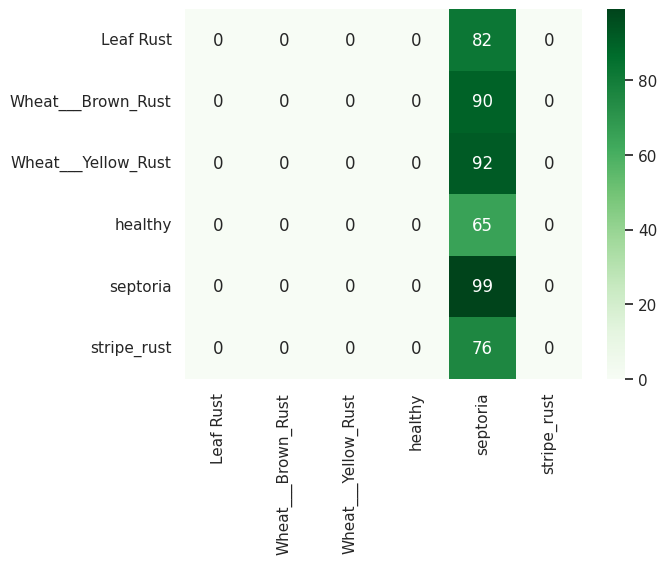

In [ ]:
cm = confusion_matrix(true_classes, y_preds)
sns.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')

In [ ]:
print(classification_report(true_classes, y_preds, target_names=class_labels))

                     precision    recall  f1-score   support

          Leaf Rust       0.00      0.00      0.00        82
 Wheat___Brown_Rust       0.00      0.00      0.00        90
Wheat___Yellow_Rust       0.00      0.00      0.00        92
            healthy       0.00      0.00      0.00        65
           septoria       0.20      1.00      0.33        99
        stripe_rust       0.00      0.00      0.00        76

           accuracy                           0.20       504
          macro avg       0.03      0.17      0.05       504
       weighted avg       0.04      0.20      0.06       504



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#plotting graph

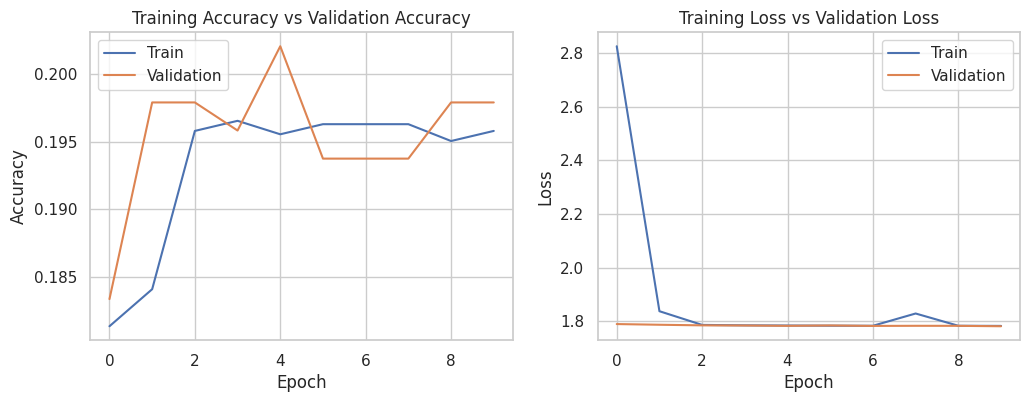

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history_mb.history['accuracy']
train_loss = history_mb.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history_mb.history['accuracy'])
ax[0].plot(history_mb.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history_mb.history['loss'])
ax[1].plot(history_mb.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [ ]:
#saving model

In [ ]:
from tensorflow.keras.models import save_model

save_model(model_mb, "mobilenet.h5", save_format="h5")

<ipython-input-138-0b28825a8ef8>:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_mb, "mobilenet.h5", save_format="h5")


In [ ]:
!mv mobilenet.h5 drive/MyDrive/